In [1]:
import hashlib
import time

try:
    long        # Python 2
    xrange
except NameError:
    long = int  # Python 3
    xrange = range

max_nonce = 2 ** 64  # 18.4 quintillion

list_avg_elapsed_time = []    # Declaring a list variable for average elapsed time
list_avg_hash_power = []      # Declaring a list variable for average hash power

def proof_of_work(header, difficulty_bits):
    # calculate the difficulty target
    target = 2 ** (512 - difficulty_bits)    # Change hash algorithm from SHA256 to SHA512

    for nonce in xrange(max_nonce):
        hash_result = hashlib.sha512((str(header) + str(nonce)).encode()).hexdigest()  # Use SHA512 hash algorithm

        # check if this is a valid result, equal to or below the target
        # long(number, base of number)
        if long(hash_result, 16) <= target:
            print("Success with nonce %d" % nonce)
            print("Hash is %s" % hash_result)
            return (hash_result, nonce)

    print("Failed after %d (max_nonce) tries" % nonce)
    return nonce

hash_result = '' # initialize hash_result to empty string

for difficulty_bits in xrange(21):    # Change loop to range from 0 to 20
    difficulty = 2 ** difficulty_bits
    print("Difficulty: %d (%d bits)" % (difficulty, difficulty_bits))
    print("Starting search...")
    
    elapsed_times = []
    hash_powers = []

    for i in range(20):    # Create an inner for-loop to iterate 20 times
        header = str(time.time()) + str(hash_result)
        start_time = time.time()

        new_block = 'test block with transactions' + hash_result
        (hash_result, nonce) = proof_of_work(header, difficulty_bits)

        end_time = time.time()
        elapsed_time = end_time - start_time
        elapsed_times.append(elapsed_time)

        if elapsed_time > 0:
            hash_power = float(nonce) / elapsed_time
            hash_powers.append(hash_power)

    avg_elapsed_time = sum(elapsed_times) / float(len(elapsed_times))
    avg_hash_power = sum(hash_powers) / float(len(hash_powers))

    print("Average Elapsed Time: %.4f seconds" % avg_elapsed_time)
    print("Average Hashing Power: %.2f hashes per second" % avg_hash_power)
    
    # Append average elapsed time and average hash power to respective lists
    list_avg_elapsed_time.append(avg_elapsed_time)
    list_avg_hash_power.append(avg_hash_power)

    print("==========================================================")

Difficulty: 1 (0 bits)
Starting search...
Success with nonce 0
Hash is 2e5147721063df277d944f6ef1076d148c9c609309346d80fa17f63597443ccffc2ad5fd5c88f8bc828226bedec14351ad9a7f21c7a52020a445ee1d89e85420
Success with nonce 0
Hash is 4c2a28b3113024e09301f3ec00e2549721531c59f80ea183265d4b213155db903052c80d2c358b215fc36c2c363539b90bebdaf2199a92f779eb5efaf14060b8
Success with nonce 0
Hash is 887f4e01cbe595eb6a1bdfa79a00dc41eb59b96272987de0617556d1147a321df0ca3c1b86145f888efcbf3fe3281a9e87ee2489ef438aff44414c64e2560867
Success with nonce 0
Hash is 2a5ecdf1c7caaff854ea47d1d1b59f99f5569fe320d3f4faa79652b000926b9f7c6cea1fea68cad692a67eb960e0293f923fe8c29b8ac25691f2fe315a19d03c
Success with nonce 0
Hash is 85e7432be262c752a20b1d99196968ef63feddda827c75bf24592715b8f0018f062df90cfa7d1249992e24184359cbcb47c4b53bc3e4a5df24b694cfdbbff4ca
Success with nonce 0
Hash is 6f9e39690f07e8bd09793c9a1cb01e02d79442c991bab8b5c01f65bcd128eb841e2deaa9c924b056a5551d02e6206ffe3c19c1e27ea95ab553b0e6ce0ff257a1
Success wi

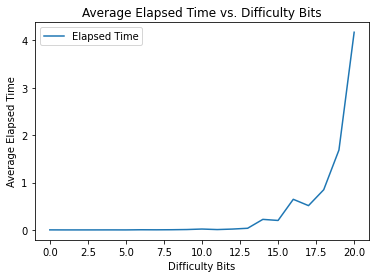

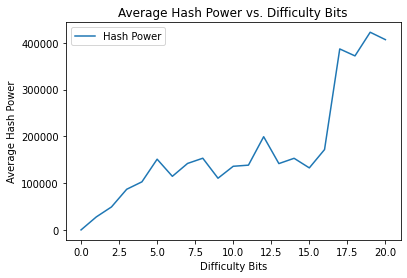

In [2]:
import matplotlib.pyplot as plt

# Define the difficulty bits range
difficulty_bits_range = list(range(21))

# Plot average elapsed time vs. difficulty bits
plt.plot(difficulty_bits_range, list_avg_elapsed_time, label='Elapsed Time')
plt.xlabel('Difficulty Bits')
plt.ylabel('Average Elapsed Time')
plt.title('Average Elapsed Time vs. Difficulty Bits')
plt.legend()
plt.show()
print("")
# Plot average hash power vs. difficulty bits
plt.plot(difficulty_bits_range, list_avg_hash_power, label='Hash Power')
plt.xlabel('Difficulty Bits')
plt.ylabel('Average Hash Power')
plt.title('Average Hash Power vs. Difficulty Bits')
plt.legend()
plt.show()
